### Librerías

In [1]:
import os
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

### Carga de imagen

In [2]:
imgPath = "../imgs/canterasegmento.png"

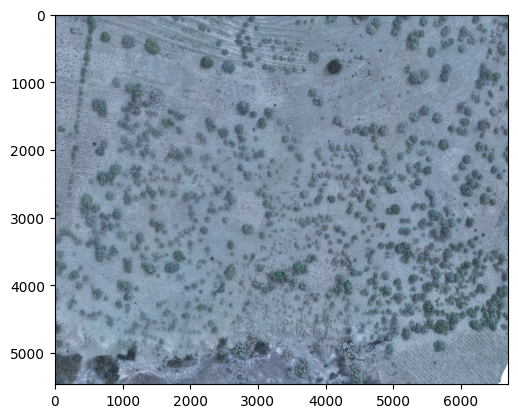

In [3]:
# Imagen por defecto, en BGR
img = cv.imread(imgPath, cv.IMREAD_UNCHANGED)
plt.imshow(img)

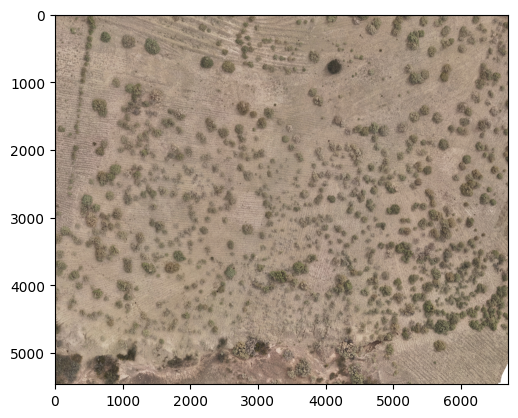

In [21]:
# Imagen en RGB
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)

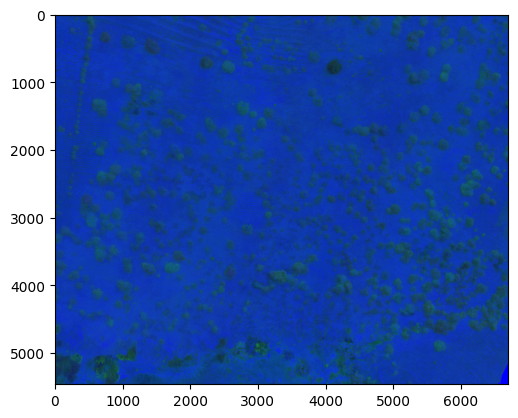

In [4]:
# Imagen a HSV
imgHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
plt.imshow(imgHSV)


In [16]:
# Guardar la imagen
plt.imsave("../imgs/canteraSegmentoHSV.png",imgHSV)

In [18]:
# Otra forma de guardar la imagen
cv.imwrite("../imgs/canteraSegmentoHSV_2.png", imgHSV)

True

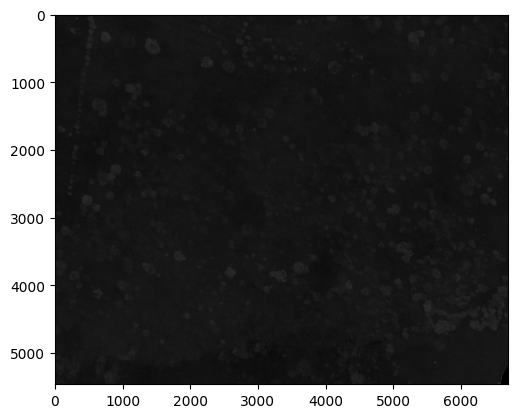

In [19]:
# Revisando lo datos HSV
h,s,v = cv.split(imgHSV)
plt.imshow(h, cmap="gray")


### Análisis de la imagen

Histogramas

In [5]:
blueHist = cv.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
greenHist = cv.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
redHist = cv.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

In [6]:
def CalculateHistBGR(image):

    colors = ('b','g','r')

    for i,col in enumerate(colors):
        plt.title("Histograma") 
        img_hist = cv.calcHist([image],channels=[i],mask=None,histSize=[256],ranges=[0,256])
        plt.plot(img_hist,color=col)
        plt.xlabel("Intensidad")
        plt.ylabel("Frecuencia")
        plt.xlim([0,256])

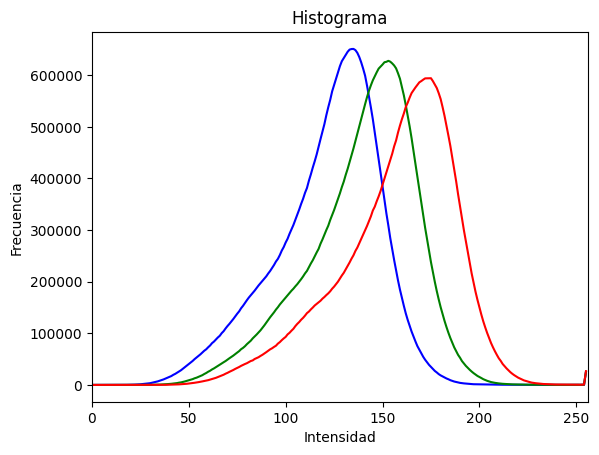

In [17]:
CalculateHistBGR(img)

#### Ecualización

In [8]:
# Hacer una copia de la imagen HSV
imgHSV_copy = imgHSV.copy()


In [9]:
imgHSV_copy[:,:,2] = cv.equalizeHist(imgHSV_copy[:,:,2])

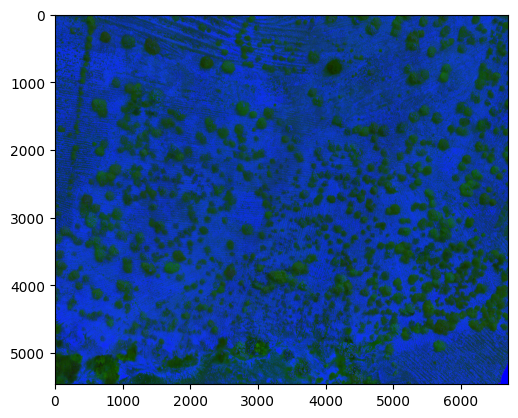

In [10]:
plt.imshow(imgHSV_copy)

(0.0, 256.0)

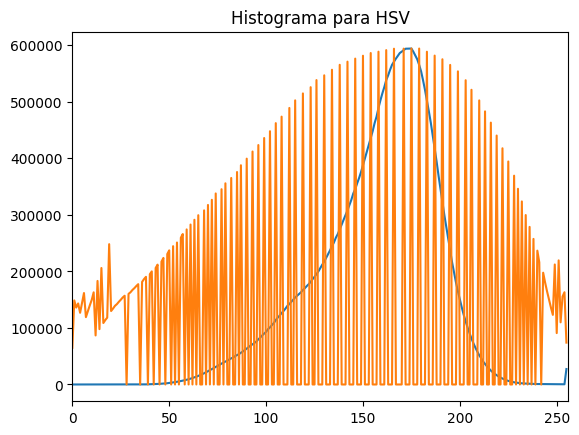

In [ ]:
# Histograma para el HSV y HSV ecualizada
plt.title("Histograma para HSVs")
img_hist = cv.calcHist([imgHSV],channels=[2],mask=None,histSize=[256],ranges=[0,256])
img_hist2 = cv.calcHist([imgHSV_copy],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(img_hist)
plt.plot(img_hist2)
plt.xlim([0,256])


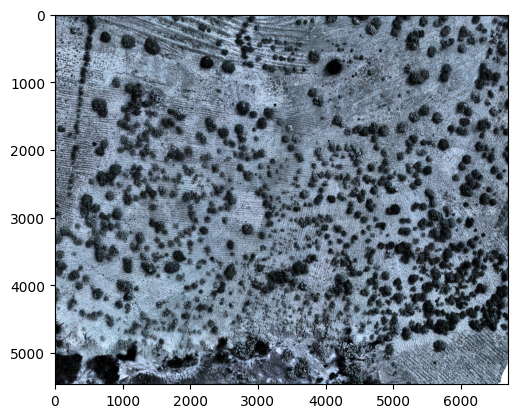

In [11]:
# Convertir a RGB

imgHSV_BGR = cv.cvtColor(imgHSV_copy,cv.COLOR_HSV2BGR)
plt.imshow(imgHSV_BGR)


In [14]:
cv.namedWindow('custom window', cv.WINDOW_KEEPRATIO)
cv.imshow('custom window',imgHSV_BGR)
cv.resizeWindow('custom window', 800, 600)
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
# Guardar la imagen HSV y la HSV_BGR
cv.imwrite("../imgs/canteraSegmentoHSV_ecualizada.png", imgHSV_copy)
cv.imwrite("../imgs/canteraSegmentoHSV_eculizada_BGR.png", imgHSV_BGR)

True

In [24]:
cv.imwrite("../imgs/canteraSegmentoHSV_ecualizada.tiff", imgHSV_copy)


True

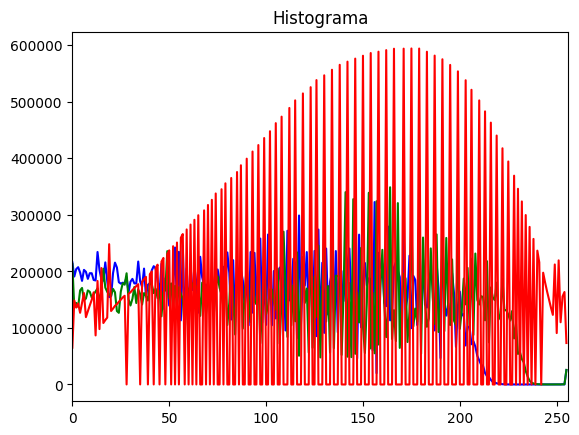

In [15]:
CalculateHistBGR(imgHSV_BGR)

In [ ]:
# Umbral





### Cálculos según paper